In [1]:
from keras.datasets import imdb

# 只保留训练数据中10000个最常出现的单词
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 3s 0us/step


In [5]:
train_labels[0]

1

In [7]:
# 解码第一条影评
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [9]:
import numpy as np

def vectorize_seqs(seqs, dims=10000):
    res = np.zeros((len(seqs), dims))
    for i,s in enumerate(seqs):
        res[i, s] = 1.
    return res

train_x = vectorize_seqs(train_data)
test_x = vectorize_seqs(test_data)

In [10]:
train_x.shape

(25000, 10000)

In [11]:
train_y = np.asarray(train_labels).astype('float32')
test_y = np.asarray(test_labels).astype('float32')

In [26]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [27]:
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [34]:
from keras import optimizers
from keras import losses
from keras import metrics

model_recompiled = models.Sequential()
model_recompiled.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model_recompiled.add(layers.Dense(16, activation="relu"))
model_recompiled.add(layers.Dense(1, activation="sigmoid"))

model_recompiled = model_recompiled.compile(optimizer=optimizers.RMSprop(lr=0.001),
                                           loss=losses.binary_crossentropy,
                                           metrics=[metrics.binary_accuracy])

In [20]:
valid_x = train_x[:10000]
partial_train_x = train_x[10000:]

valid_y = train_y[:10000]
partial_train_y = train_y[10000:]

In [21]:
history = model.fit(partial_train_x, 
                    partial_train_y, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(valid_x, valid_y))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 335us/step - loss: 0.5274 - acc: 0.7868 - val_loss: 0.3990 - val_acc: 0.8657
Epoch 2/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.3162 - acc: 0.8999 - val_loss: 0.3086 - val_acc: 0.8860
Epoch 3/20
15000/15000 [==============================] - 3s 176us/step - loss: 0.2295 - acc: 0.9257 - val_loss: 0.2965 - val_acc: 0.8830
Epoch 4/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1812 - acc: 0.9426 - val_loss: 0.2770 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1483 - acc: 0.9539 - val_loss: 0.2809 - val_acc: 0.8890
Epoch 6/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1238 - acc: 0.9621 - val_loss: 0.3085 - val_acc: 0.8799
Epoch 7/20
15000/15000 [==============================] - 2s 121us/step - 

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

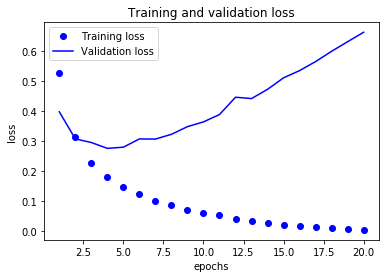

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_vals = history_dict['loss']
valid_loss_vals = history_dict['val_loss']

epochs = range(1, len(loss_vals)+1)
plt.plot(epochs, loss_vals, 'bo', label='Training loss')
plt.plot(epochs, valid_loss_vals, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

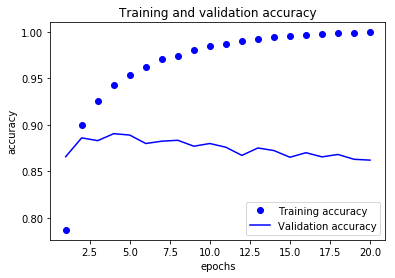

In [25]:
acc_vals = history_dict['acc']
valid_acc_vals = history_dict['val_acc']

epochs = range(1, len(acc_vals)+1)
plt.plot(epochs, acc_vals, 'bo', label='Training accuracy')
plt.plot(epochs, valid_acc_vals, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

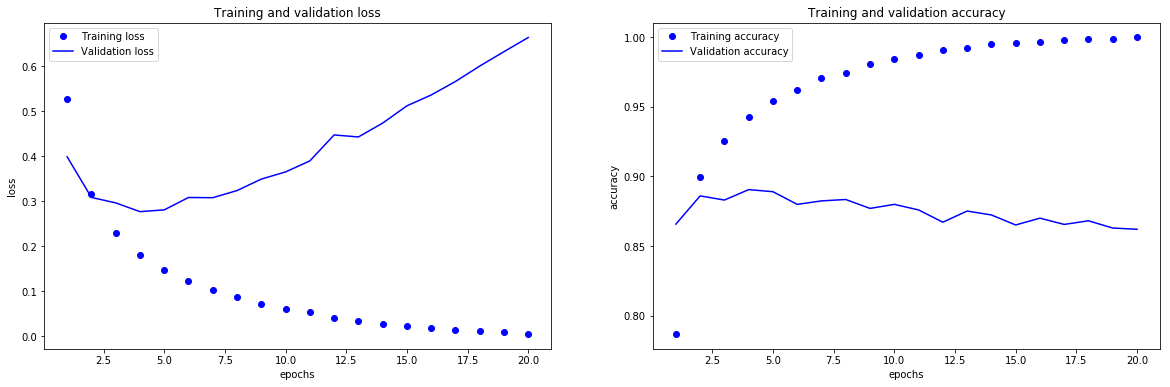

In [41]:
loss_vals = history_dict['loss']
valid_loss_vals = history_dict['val_loss']
acc_vals = history_dict['acc']
valid_acc_vals = history_dict['val_acc']

epochs = range(1, len(loss_vals)+1)

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_vals, 'bo', label='Training loss')
plt.plot(epochs, valid_loss_vals, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_vals, 'bo', label='Training accuracy')
plt.plot(epochs, valid_acc_vals, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [28]:
model.fit(train_x, train_y, epochs=4, batch_size=512)
result = model.evaluate(test_x, test_y)

Epoch 1/4
25000/25000 [==============================] - 5s 198us/step - loss: 0.4751 - acc: 0.8212
Epoch 2/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.2671 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.1990 - acc: 0.9287
Epoch 4/4
25000/25000 [==============================] - 4s 162us/step


In [29]:
result

[0.3223801641654968, 0.87364]

In [45]:
train_data.shape
test_x.shape

(25000, 10000)